In [27]:
#the idea is this will have one hot encode the data, then describe everything, have each of our individual visualisation models
#Each of us can add our own visualisation method


In [28]:
import pandas as pd # data processing
import numpy as np # linear algebra
import seaborn as sns # for plotting
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("Breast_Cancer.csv") #read dataset
df.head()#shows first few values

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [30]:
df.drop("Status", axis=1, inplace=True)
df.drop("Marital Status", axis=1, inplace=True)
df.drop("Race", axis=1, inplace=True)
df.drop("differentiate", axis=1, inplace=True)

In [31]:
df.isnull().sum()#checking for null values

Age                       0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
dtype: int64

In [32]:
df.info() #checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   T Stage                 4024 non-null   object
 2   N Stage                 4024 non-null   object
 3   6th Stage               4024 non-null   object
 4   Grade                   4024 non-null   object
 5   A Stage                 4024 non-null   object
 6   Tumor Size              4024 non-null   int64 
 7   Estrogen Status         4024 non-null   object
 8   Progesterone Status     4024 non-null   object
 9   Regional Node Examined  4024 non-null   int64 
 10  Reginol Node Positive   4024 non-null   int64 
 11  Survival Months         4024 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 377.4+ KB


In [33]:
df.columns

Index(['Age', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage',
       'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months'],
      dtype='object')

In [34]:
#Changing all categorical features to numerical
df.dtypes
categorical_features = df.select_dtypes(include = "object").columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder
df.loc[df['Grade'] == 'anaplastic; Grade IV', 'Grade'] = 4
df.rename({'Tumor Size': 'Tumor Size (mm)',
               'Reginol Node Positive': 'Regional Node Positive', 'differentiate': 'Differentiate'}, axis=1, inplace=True)
df['Grade'] = df['Grade'].map({'1': 'Grade 1', '2': 'Grade 2', '3': 'Grade 3', ' anaplastic; Grade IV': 'Grade 4'})



df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform) # Encoding all categorical features
df

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,68,0,0,0,2,1,4,1,1,24,1,60
1,50,1,1,2,1,1,35,1,1,14,5,62
2,58,2,2,4,1,1,63,1,1,14,7,75
3,58,0,0,0,2,1,18,1,1,2,1,84
4,47,1,0,1,2,1,41,1,1,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,0,0,0,1,1,9,1,1,1,1,49
4020,56,1,1,2,1,1,46,1,1,14,8,69
4021,68,1,0,1,1,1,22,1,0,11,3,69
4022,58,1,0,1,1,1,44,1,1,11,1,72


In [35]:
df.describe()

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,0.784791,0.438370,1.321819,1.150596,0.977137,30.473658,0.933151,0.826541,14.357107,4.158052,71.297962
std,8.963134,0.765531,0.693479,1.266624,0.638234,0.149485,21.119696,0.249791,0.378691,8.099675,5.109331,22.921430
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,47.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000,1.000000,1.000000,9.000000,1.000000,56.000000
50%,54.000000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,1.000000,1.000000,14.000000,2.000000,73.000000
75%,61.000000,1.000000,1.000000,2.000000,2.000000,1.000000,38.000000,1.000000,1.000000,19.000000,5.000000,90.000000
max,69.000000,3.000000,2.000000,4.000000,3.000000,1.000000,140.000000,1.000000,1.000000,61.000000,46.000000,107.000000


In [36]:
#HEAT MAP
#This step will simply find all the correlations between the different columns in the dataset.
correlations = df.corr()
correlations


,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
Age,1.000000,-0.066914,0.002883,-0.018741,-0.099294,0.020860,-0.077215,0.059787,-0.021269,-0.033345,0.012586,-0.009390
T Stage,-0.066914,1.000000,0.277015,0.606711,0.131470,-0.221124,0.809176,-0.060954,-0.057633,0.114102,0.243075,-0.085718
N Stage,0.002883,0.277015,1.000000,0.881880,0.162501,-0.260573,0.277905,-0.101995,-0.093723,0.328276,0.838073,-0.139577
6th Stage,-0.018741,0.606711,0.881880,1.000000,0.186943,-0.291962,0.513971,-0.105614,-0.101246,0.317219,0.773963,-0.144837
Grade,-0.099294,0.131470,0.162501,0.186943,1.000000,-0.039459,0.119367,-0.211251,-0.179860,0.084416,0.135319,-0.067669
A Stage,0.020860,-0.221124,-0.260573,-0.291962,-0.039459,1.000000,-0.123883,0.065570,0.026530,-0.069010,-0.232849,0.070109
Tumor Size (mm),-0.077215,0.809176,0.277905,0.513971,0.119367,-0.123883,1.000000,-0.059585,-0.069879,0.104352,0.242322,-0.086901
Estrogen Status,0.059787,-0.060954,-0.101995,-0.105614,-0.211251,0.065570,-0.059585,1.000000,0.513308,-0.044836,-0.085985,0.128469
Progesterone Status,-0.021269,-0.057633,-0.093723,-0.101246,-0.179860,0.026530,-0.069879,0.513308,1.000000,-0.018051,-0.078069,0.096018
Regional Node Examined,-0.033345,0.114102,0.328276,0.317219,0.084416,-0.069010,0.104352,-0.044836,-0.018051,1.000000,0.411580,-0.022054


<Axes: >

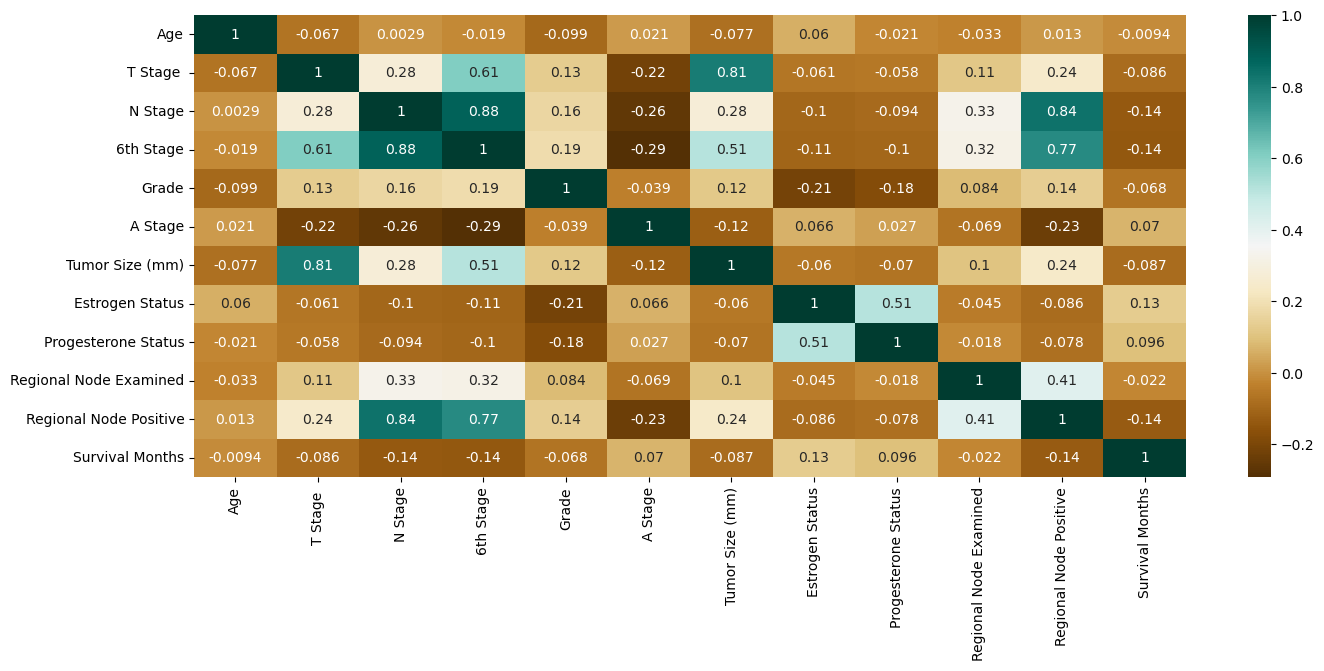

In [37]:
plt.figure(figsize=(16, 6))
sns.heatmap(correlations, annot=True, cmap='BrBG')
# A visualisation of these correlations can be seen in the heatmap below.
#Highly correlated variables include (T stage, Tumor size), (Regional Node Positive, N stage)

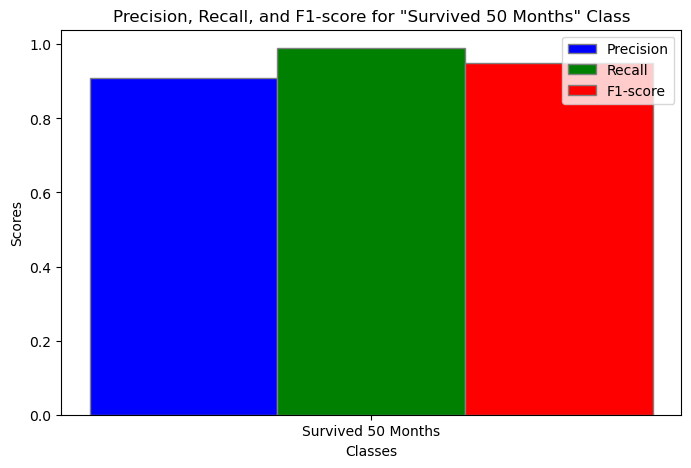

In [38]:

import matplotlib.pyplot as plt

# Precision, Recall, and F1-score values for 'Survived 50 Months' class
precision = [0.91]
recall = [0.99]
f1_score = [0.95]

# Labels for the class
labels = ['Survived 50 Months']

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))

# Width of bars
bar_width = 0.2

# Position of bars on x-axis
r1 = range(len(precision))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars
ax.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
ax.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
ax.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-score')

# Adding xticks
ax.set_xticks([r + bar_width for r in range(len(precision))])
ax.set_xticklabels(labels)

# Adding legend
ax.legend()

# Adding labels
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score for "Survived 50 Months" Class')

# Show plot
plt.show()


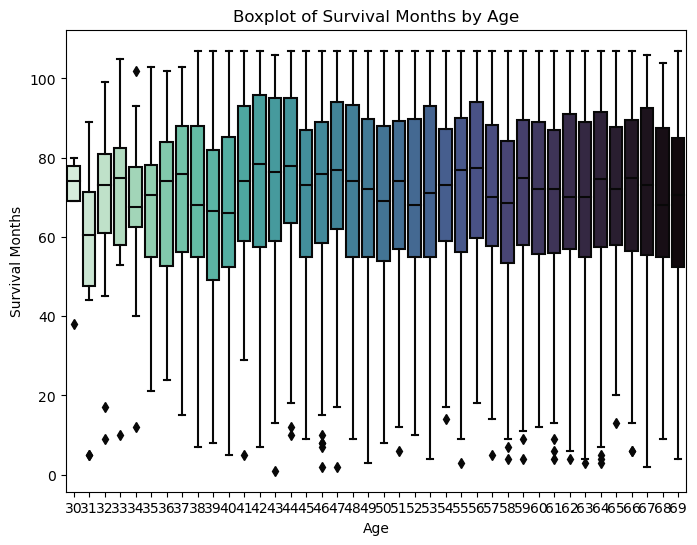

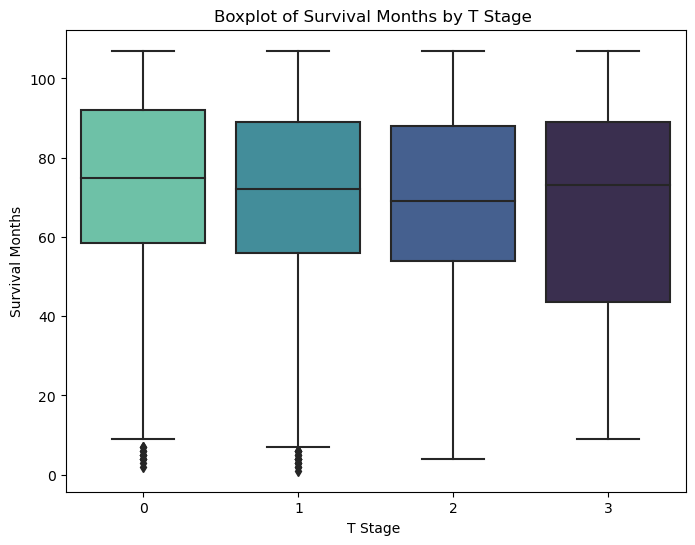

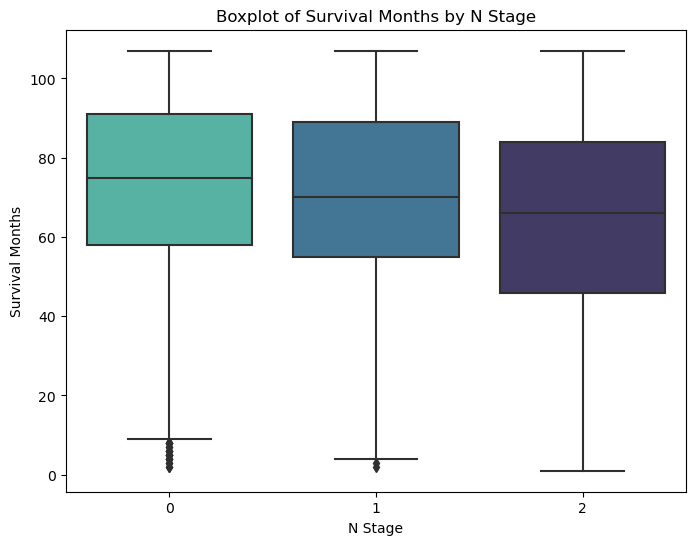

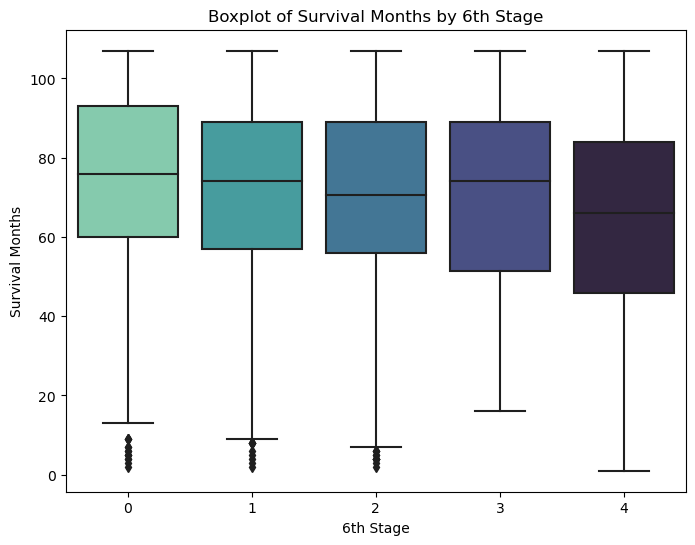

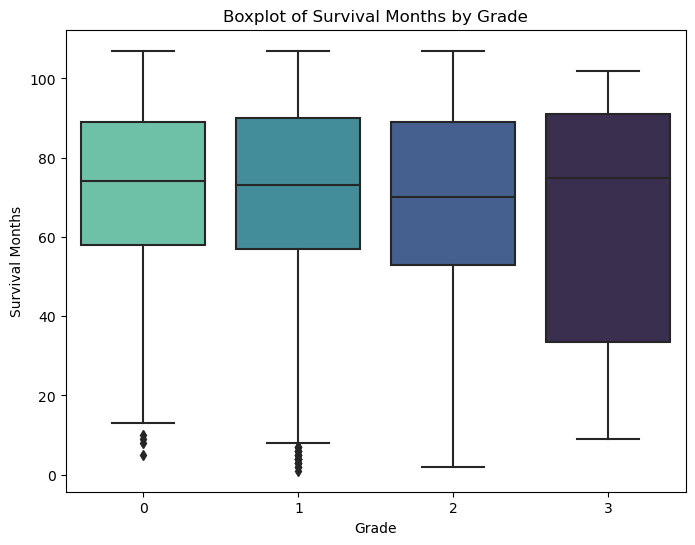

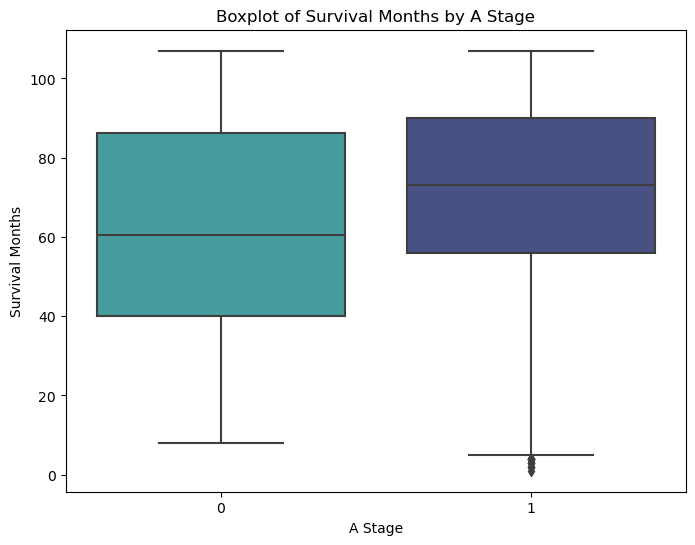

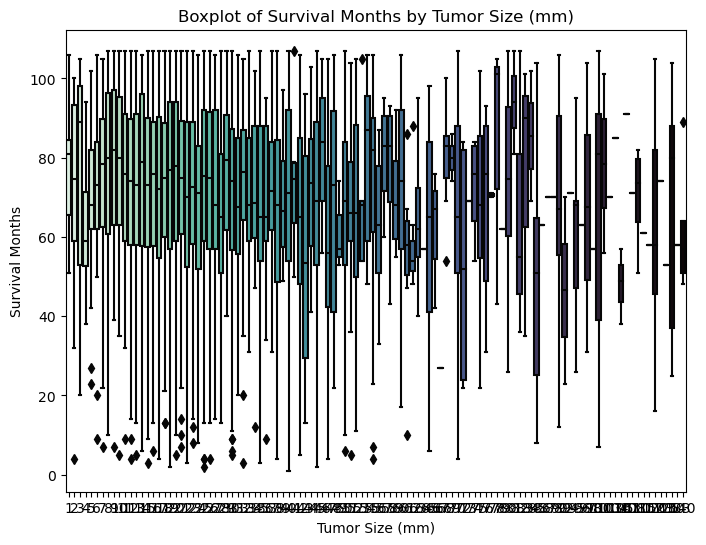

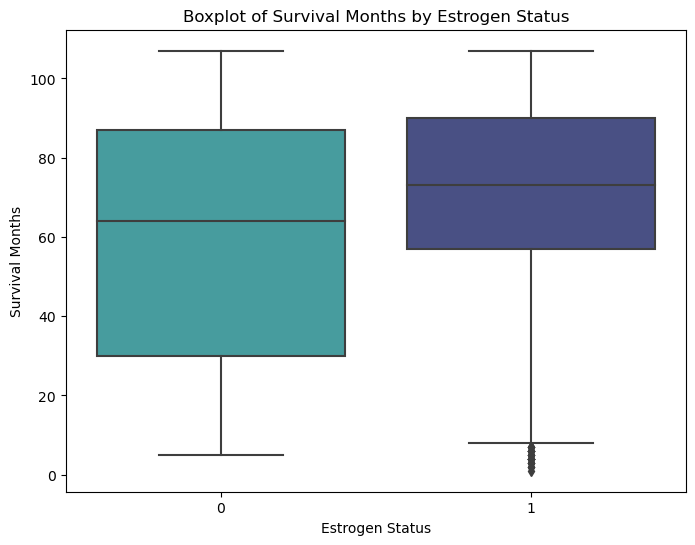

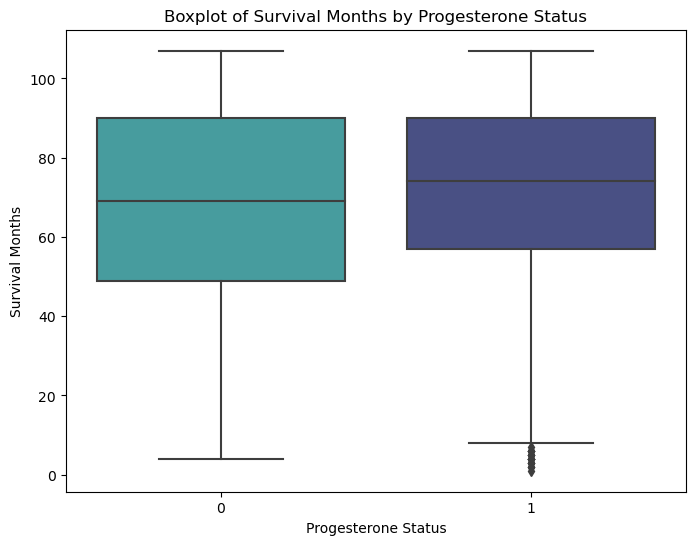

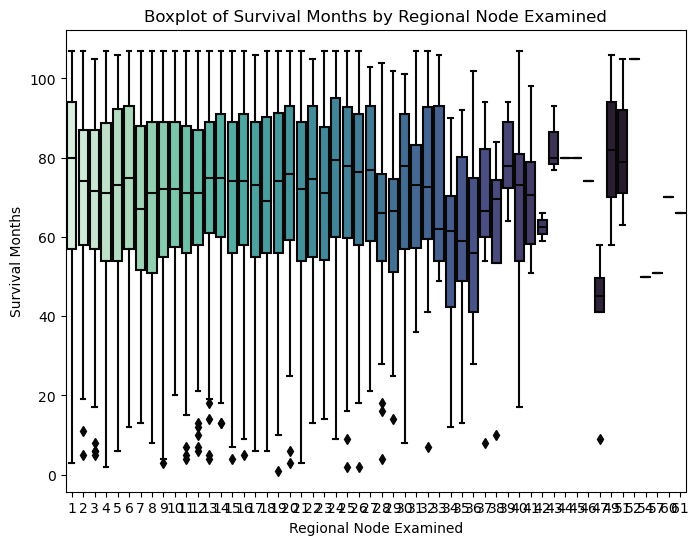

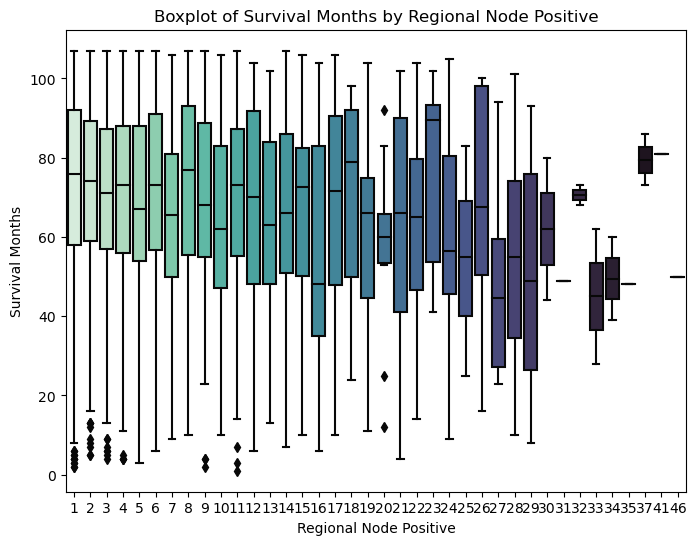

In [42]:
#Boxplots for survival months
survival_months = "Survival Months"
for col in df.columns:
    if col != survival_months:
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.boxplot(data=df, x=col, y=df[survival_months], palette='mako_r')
        ax.set_title(f'Boxplot of {survival_months} by {col}')
        ax.set_xlabel(col)
        ax.set_ylabel(survival_months)
        plt.show()


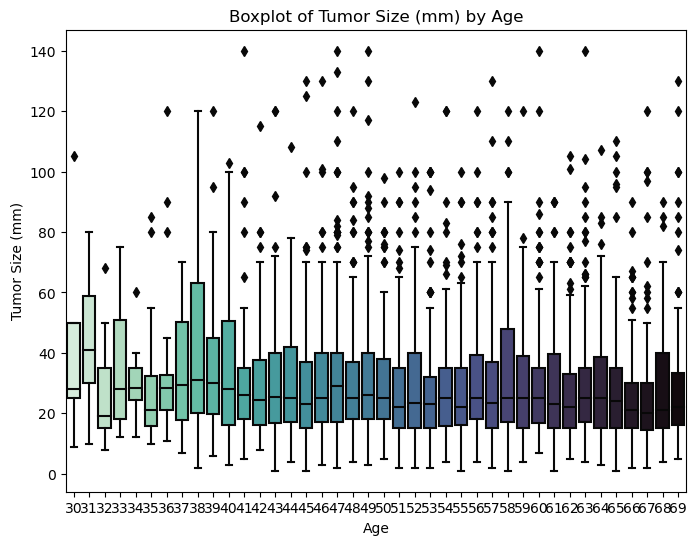

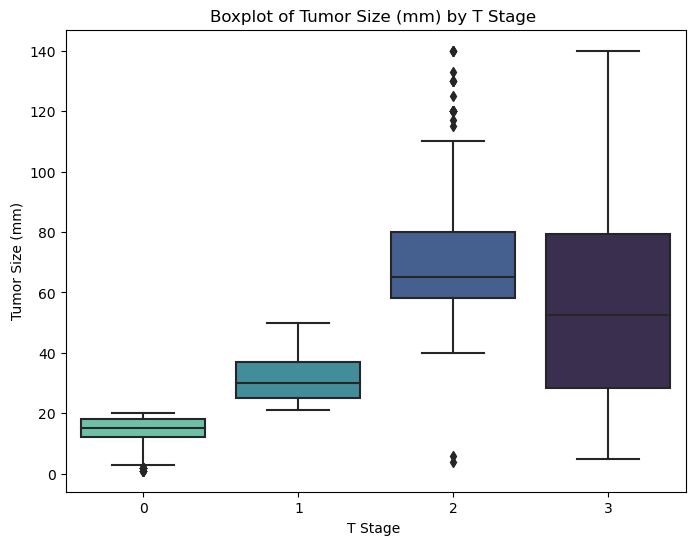

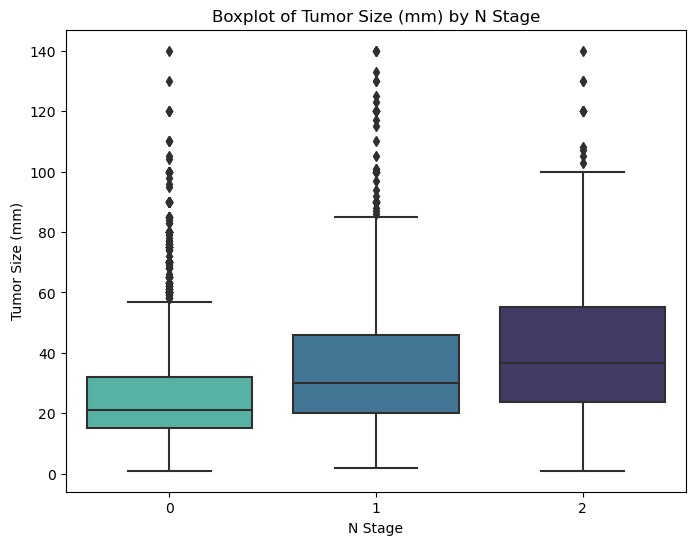

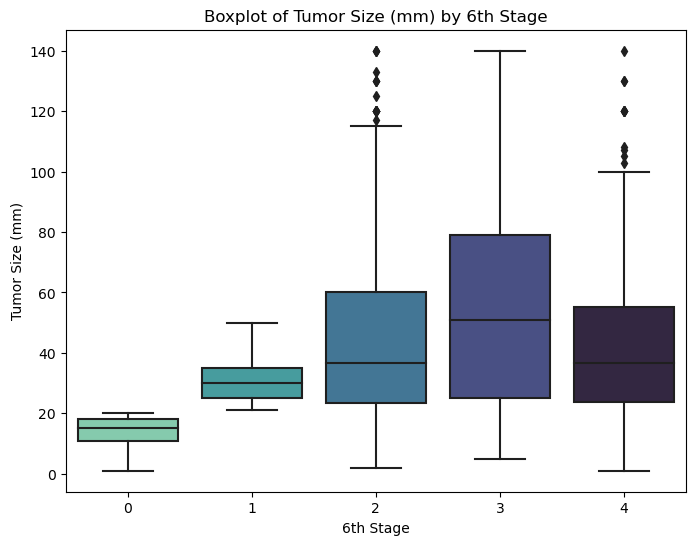

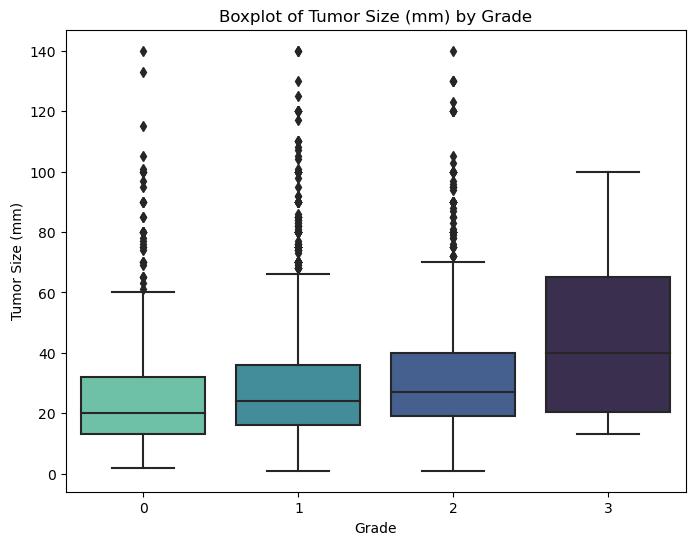

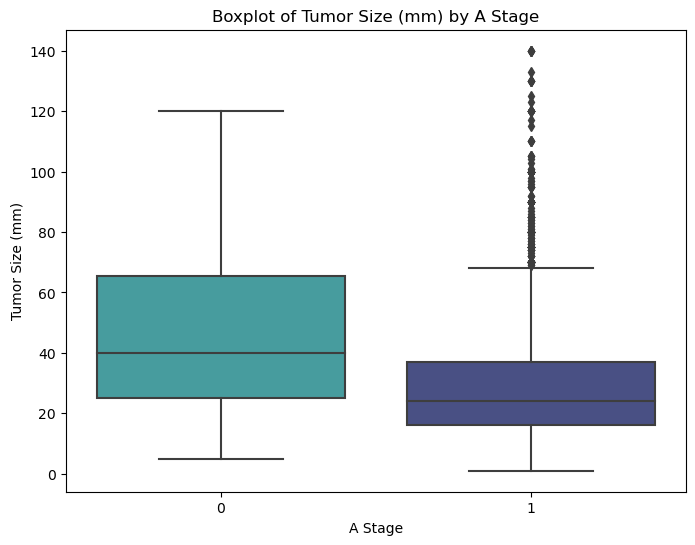

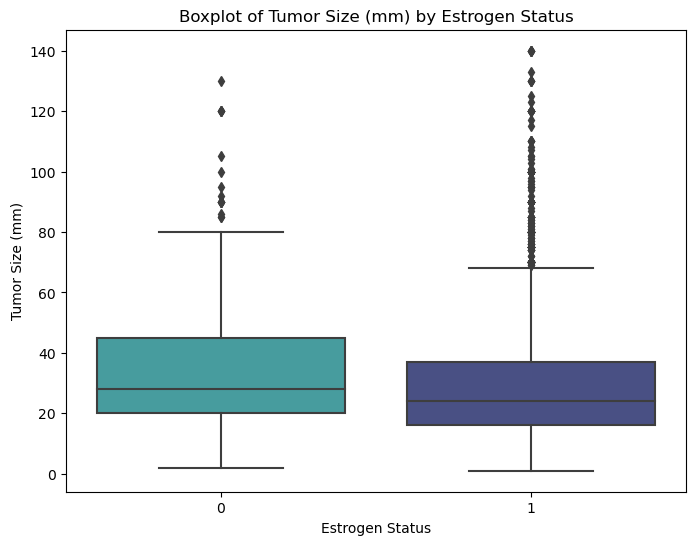

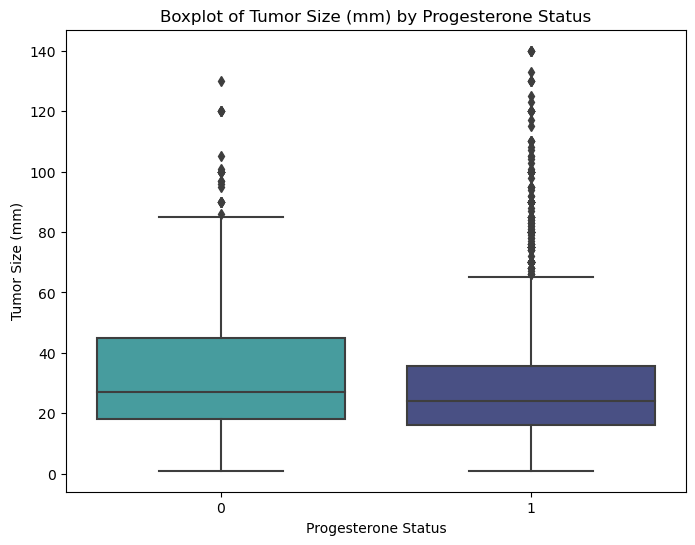

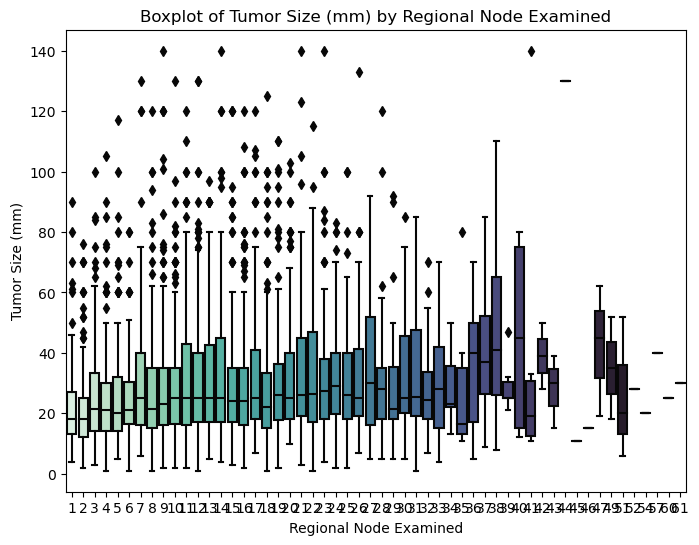

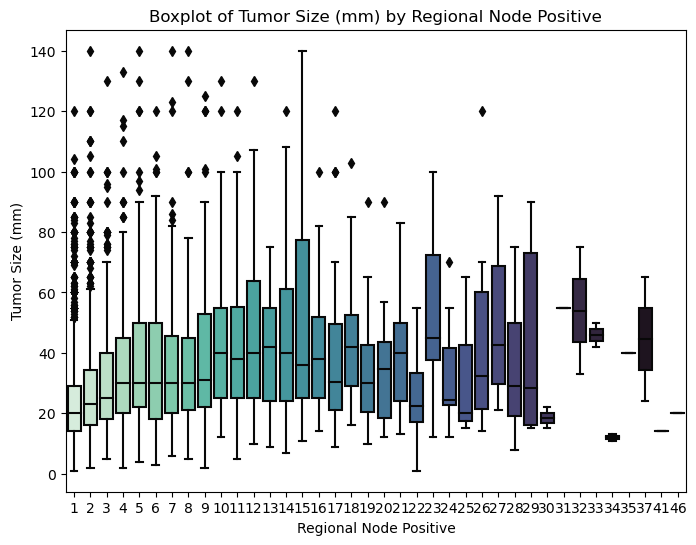

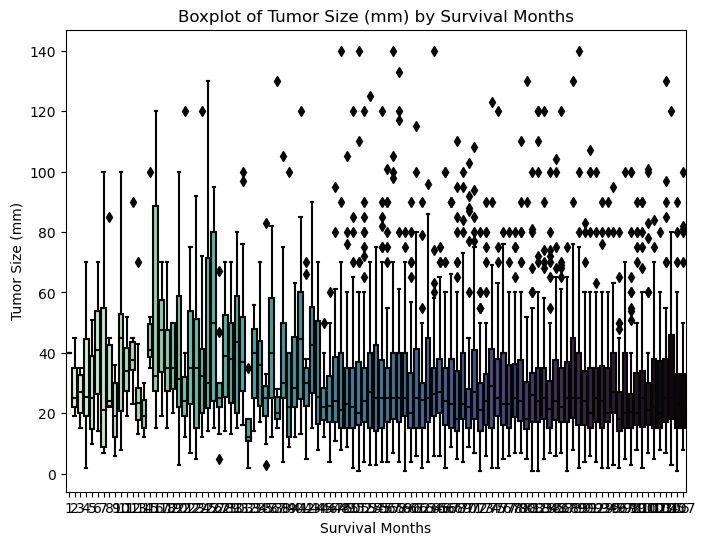

In [40]:
#Boxplots for "Tumor Size (mm)"
tumor_size_column = "Tumor Size (mm)"

for col in df.columns:
    if col != tumor_size_column:  
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.boxplot(data=df, x=col, y=df[tumor_size_column], palette='mako_r')
        ax.set_title(f'Boxplot of {tumor_size_column} by {col}')
        ax.set_xlabel(col)
        ax.set_ylabel(tumor_size_column)
        plt.show()


In [41]:
df_sample = df.sample(frac=0.01) # Downsample the data
sns.scatterplot(data=df_sample, x="Age", y="Survival Months", hue="T Stage");
#etc

ValueError: Could not interpret value `T Stage` for parameter `hue`